ID                             0
Source                         0
Severity                       0
Start_Time                743166
End_Time                  743166
Start_Lat                      0
Start_Lng                      0
End_Lat                  3402762
End_Lng                  3402762
Distance(mi)                   0
Description                    5
Street                     10869
City                         253
County                         0
State                          0
Zipcode                     1915
Country                        0
Timezone                    7808
Airport_Code               22635
Weather_Timestamp         120228
Temperature(F)            163853
Wind_Chill(F)            1999019
Humidity(%)               174144
Pressure(in)              140679
Visibility(mi)            177098
Wind_Direction            175206
Wind_Speed(mph)           571233
Precipitation(in)        2203586
Weather_Condition         173459
Amenity                        0
Bump      

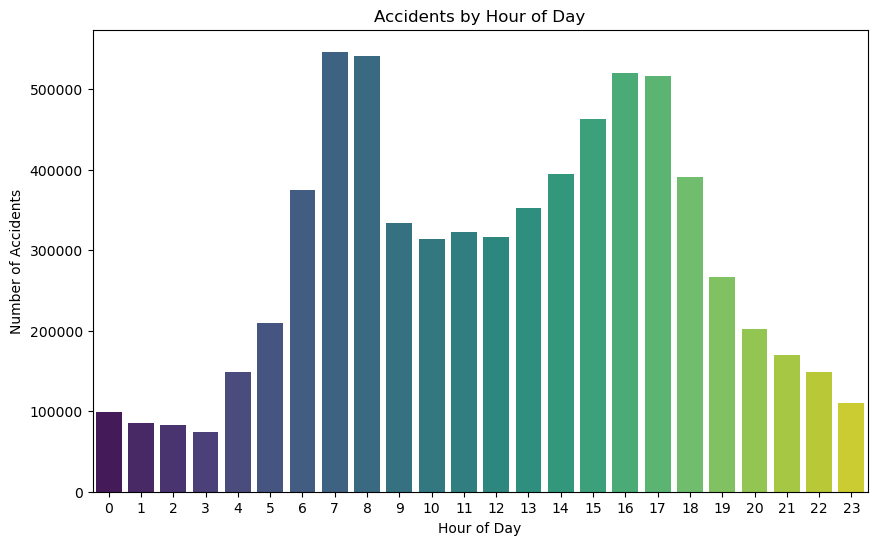

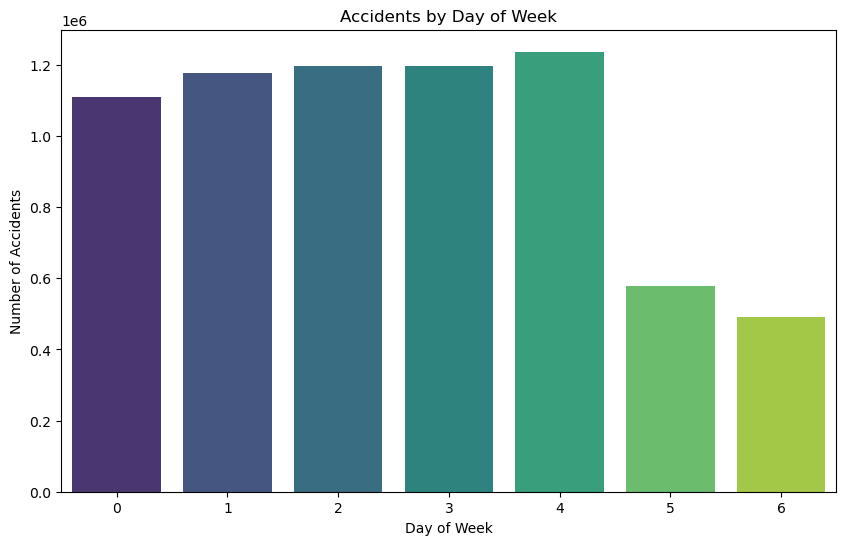

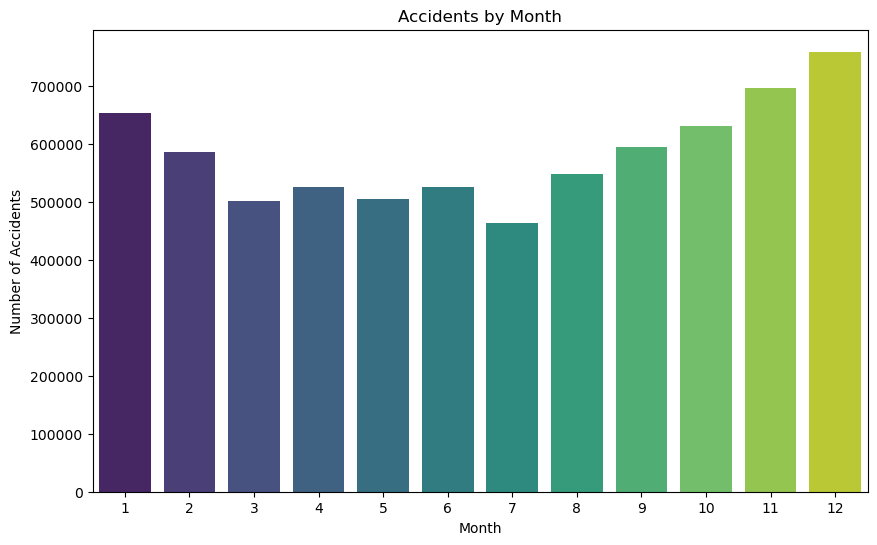

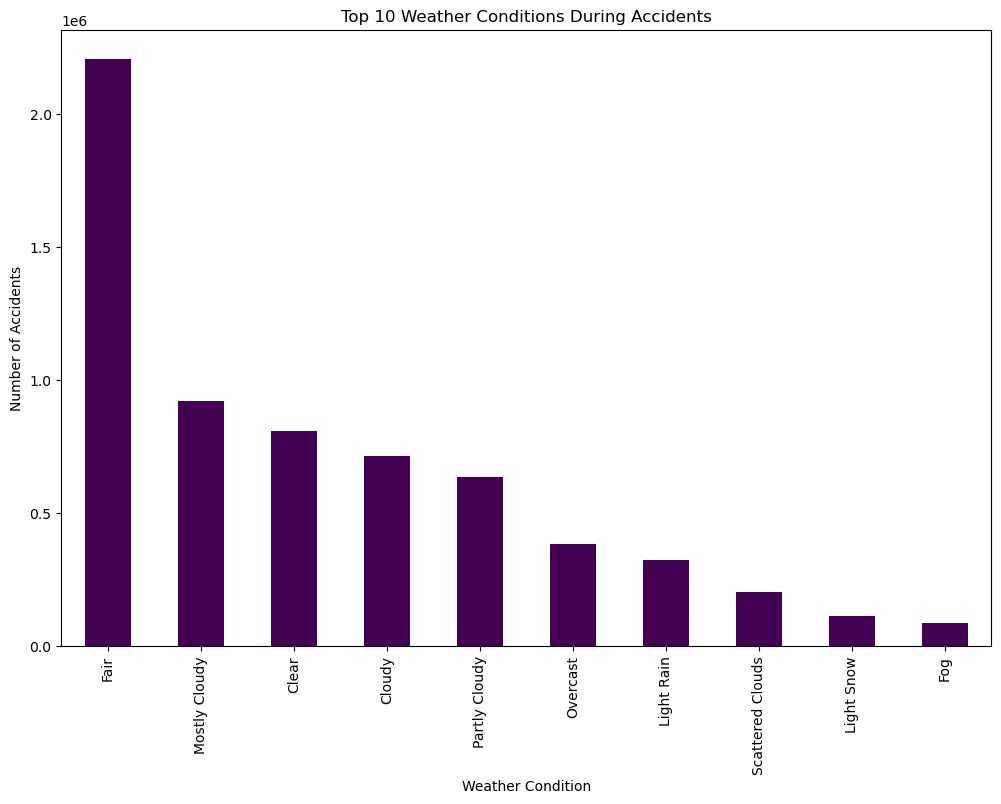

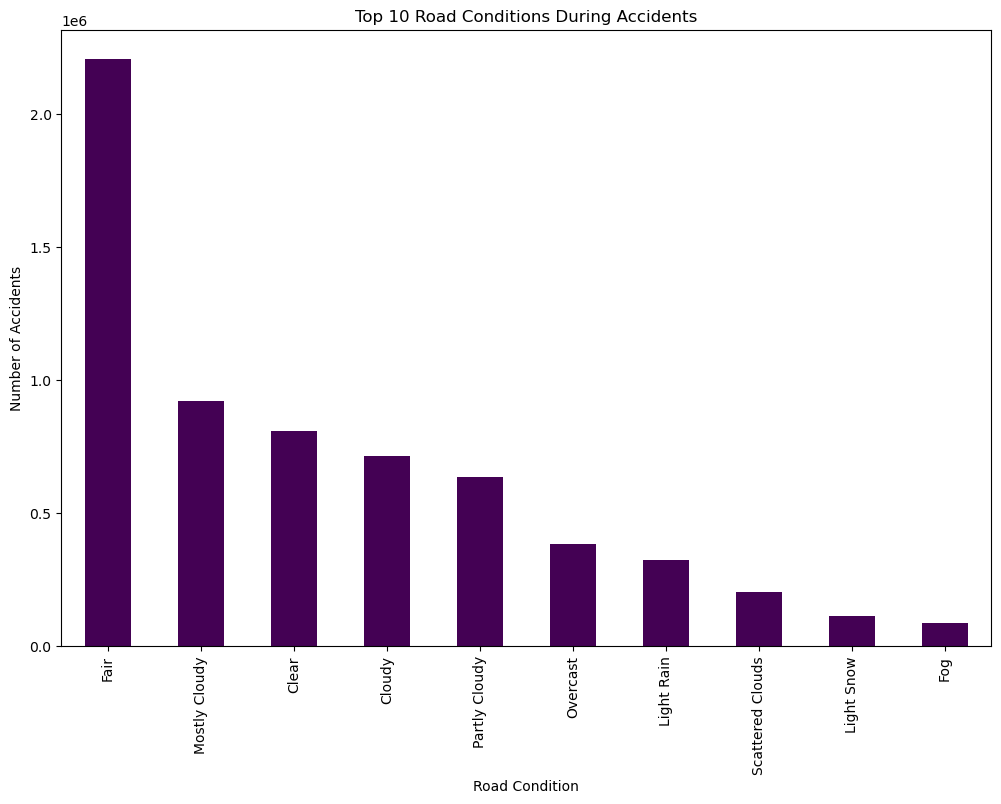

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from folium.plugins import HeatMap

# Load the CSV file into a DataFrame
file_path = r'C:\Users\Ubaid-khan\Desktop\Internship\US_Accidents_March23.csv'
df = pd.read_csv(file_path)

# Convert 'Start_Time' and 'End_Time' to datetime objects
df['Start_Time'] = pd.to_datetime(df['Start_Time'], errors='coerce')
df['End_Time'] = pd.to_datetime(df['End_Time'], errors='coerce')

# Check for missing values after conversion
missing_values = df.isnull().sum()
print(missing_values)

# Drop rows with missing datetime values
df = df.dropna(subset=['Start_Time', 'End_Time'])

# Extract hour, month, and day of the week from 'Start_Time'
df['Hour'] = df['Start_Time'].dt.hour
df['Month'] = df['Start_Time'].dt.month
df['DayOfWeek'] = df['Start_Time'].dt.dayofweek

# Group by road conditions
road_conditions = df.groupby('Weather_Condition').size()

# Group by weather conditions
weather_conditions = df.groupby('Weather_Condition').size()

# Group by hour of the day
hourly_trend = df.groupby('Hour').size()

# Group by day of the week
daily_trend = df.groupby('DayOfWeek').size()

# Group by month
monthly_trend = df.groupby('Month').size()

# Print the trends
print("Road Conditions Trend:\n", road_conditions)
print("Weather Conditions Trend:\n", weather_conditions)
print("Hourly Trend:\n", hourly_trend)
print("Daily Trend:\n", daily_trend)
print("Monthly Trend:\n", monthly_trend)

# Plot hourly trend
plt.figure(figsize=(10, 6))
sns.countplot(x='Hour', data=df, palette='viridis')
plt.title('Accidents by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.show()

# Plot daily trend
plt.figure(figsize=(10, 6))
sns.countplot(x='DayOfWeek', data=df, palette='viridis')
plt.title('Accidents by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.show()

# Plot monthly trend
plt.figure(figsize=(10, 6))
sns.countplot(x='Month', data=df, palette='viridis')
plt.title('Accidents by Month')
plt.xlabel('Month')
plt.ylabel('Number of Accidents')
plt.show()

# Plot weather conditions
plt.figure(figsize=(12, 8))
weather_conditions.sort_values(ascending=False).head(10).plot(kind='bar', cmap='viridis')
plt.title('Top 10 Weather Conditions During Accidents')
plt.xlabel('Weather Condition')
plt.ylabel('Number of Accidents')
plt.show()

# Plot road conditions
plt.figure(figsize=(12, 8))
road_conditions.sort_values(ascending=False).head(10).plot(kind='bar', cmap='viridis')
plt.title('Top 10 Road Conditions During Accidents')
plt.xlabel('Road Condition')
plt.ylabel('Number of Accidents')
plt.show()

# Visualize accident hotspots using Folium
# Create a map centered at an average location
map_center = [df['Start_Lat'].mean(), df['Start_Lng'].mean()]
accident_map = folium.Map(location=map_center, zoom_start=5)

# Add heatmap layer
heat_data = [[row['Start_Lat'], row['Start_Lng']] for index, row in df.iterrows()]
HeatMap(heat_data).add_to(accident_map)

# Save the map to an HTML file
accident_map.save('accident_hotspots.html')
